# DBSCAN clustering of elephant AM105's data

## Loadning and preparing data for DBSCAN clustering

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from load_to_db import data_file_dir, read_data_from_csv
%matplotlib inline
from datetime import datetime
from sklearn.cluster import DBSCAN
# import plotly.express as px
import plotly.graph_objects as go

In [2]:
# Load data
file_dir = data_file_dir()
df = read_data_from_csv(file_dir)

In [3]:
# Select one elephant (AM105 in this case)
AM105 = df[df['tag_id'] == 'AM105']
print(AM105)

       Unnamed: 0                timestamp      long       lat  \
0               0  2007-08-13 00:30:00.000  31.87091 -24.81373   
1               1  2007-08-13 02:00:00.000  31.87399 -24.81483   
2               2  2007-08-13 03:31:00.000  31.87724 -24.81673   
3               3  2007-08-13 04:00:00.000  31.87822 -24.81569   
4               4  2007-08-13 06:00:00.000  31.89554 -24.79870   
...           ...                      ...       ...       ...   
15093       15093  2009-08-12 19:30:00.000  31.81571 -24.71985   
15094       15094  2009-08-12 20:00:00.000  31.81562 -24.71988   
15095       15095  2009-08-12 20:30:00.000  31.81518 -24.72014   
15096       15096  2009-08-12 21:00:00.000  31.81211 -24.72042   
15097       15097  2009-08-12 21:30:00.000  31.81086 -24.72041   

       external-temperature tag_id  year  month  day  hour  minute  
0                      24.0  AM105  2007      8   13     0      30  
1                      23.0  AM105  2007      8   13     2       0  


In [4]:
# Creating date column
AM105 = AM105.assign(date = pd.to_datetime(AM105['timestamp']).dt.date)
print(AM105)


       Unnamed: 0                timestamp      long       lat  \
0               0  2007-08-13 00:30:00.000  31.87091 -24.81373   
1               1  2007-08-13 02:00:00.000  31.87399 -24.81483   
2               2  2007-08-13 03:31:00.000  31.87724 -24.81673   
3               3  2007-08-13 04:00:00.000  31.87822 -24.81569   
4               4  2007-08-13 06:00:00.000  31.89554 -24.79870   
...           ...                      ...       ...       ...   
15093       15093  2009-08-12 19:30:00.000  31.81571 -24.71985   
15094       15094  2009-08-12 20:00:00.000  31.81562 -24.71988   
15095       15095  2009-08-12 20:30:00.000  31.81518 -24.72014   
15096       15096  2009-08-12 21:00:00.000  31.81211 -24.72042   
15097       15097  2009-08-12 21:30:00.000  31.81086 -24.72041   

       external-temperature tag_id  year  month  day  hour  minute        date  
0                      24.0  AM105  2007      8   13     0      30  2007-08-13  
1                      23.0  AM105  2007     

In [5]:
# Mean number of instances/observations per day
minPoints = int(AM105['date'].groupby([AM105['date']]).count().mean()) * 2

Let's say that a core point is defined as two times the average number of instances/observations per day. Thus, for a point to count as a core point, two days of obesrvation points has to be within its surrounding area.

### Some initial visualizations of the data

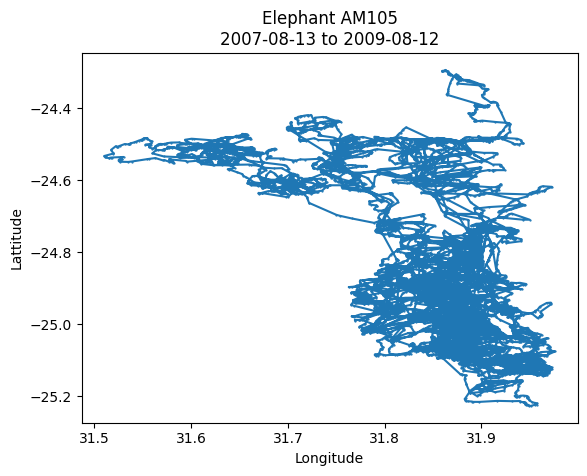

In [6]:
# Data inspection of the whole dataset
# plt.scatter(AM105['long'], AM105['lat'], s = 0.4)
plt.plot(AM105['long'], AM105['lat'], marker = 'o', markersize = 0.6)
plt.title('Elephant AM105\n2007-08-13 to 2009-08-12')
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
plt.show()

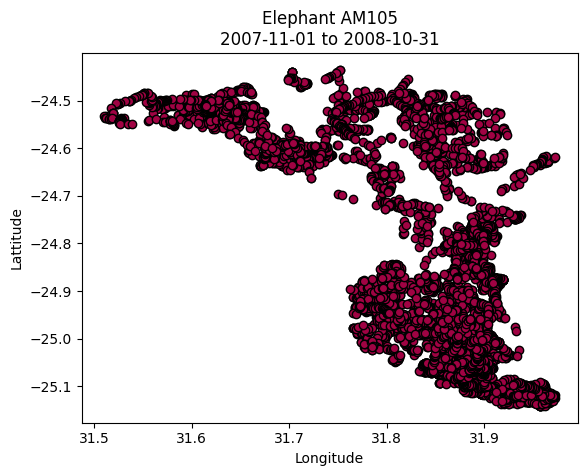

In [7]:
# Data inspection of the one year period of the data that will be used for ML
AM105_one_year = AM105.loc[(AM105['date'] >= datetime.strptime('2007-11-01', '%Y-%m-%d').date()) & 
                           (AM105['date'] <= datetime.strptime('2008-10-31', '%Y-%m-%d').date())]

plt.plot(AM105_one_year['long'], AM105_one_year['lat'], 'o', c = plt.cm.Spectral(1), markeredgecolor="k")
plt.title('Elephant AM105\n2007-11-01 to 2008-10-31')
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
plt.show()

In [8]:
# Normalization of the longitude and lattitude
scaler = StandardScaler()

norm = pd.DataFrame(scaler.fit_transform(AM105[['long', 'lat']]))
AM105 = AM105.assign(long_norm=list(norm[0]), lat_norm=list(norm[1]))

print(AM105)

       Unnamed: 0                timestamp      long       lat  \
0               0  2007-08-13 00:30:00.000  31.87091 -24.81373   
1               1  2007-08-13 02:00:00.000  31.87399 -24.81483   
2               2  2007-08-13 03:31:00.000  31.87724 -24.81673   
3               3  2007-08-13 04:00:00.000  31.87822 -24.81569   
4               4  2007-08-13 06:00:00.000  31.89554 -24.79870   
...           ...                      ...       ...       ...   
15093       15093  2009-08-12 19:30:00.000  31.81571 -24.71985   
15094       15094  2009-08-12 20:00:00.000  31.81562 -24.71988   
15095       15095  2009-08-12 20:30:00.000  31.81518 -24.72014   
15096       15096  2009-08-12 21:00:00.000  31.81211 -24.72042   
15097       15097  2009-08-12 21:30:00.000  31.81086 -24.72041   

       external-temperature tag_id  year  month  day  hour  minute  \
0                      24.0  AM105  2007      8   13     0      30   
1                      23.0  AM105  2007      8   13     2       0 

In [9]:
# Inspection
AM105[['long', 'lat', 'long_norm', 'lat_norm']].describe()

long           lat     long_norm      lat_norm
count  15098.000000  15098.000000  1.509800e+04  1.509800e+04
mean      31.847322    -24.858308 -2.575235e-14 -1.909589e-14
std        0.078876      0.213351  1.000033e+00  1.000033e+00
min       31.510030    -25.226230 -4.276360e+00 -1.724546e+00
25%       31.822205    -25.047615 -3.184450e-01 -8.873305e-01
50%       31.870135    -24.903570  2.892362e-01 -2.121541e-01
75%       31.895847    -24.718447  6.152325e-01  6.555633e-01
max       31.976310    -24.294300  1.635377e+00  2.643653e+00

In [10]:
# Creating a rain season and a dry season dataframe
# Nov-apr
AM105_rain = AM105.loc[(AM105['date'] >= datetime.strptime('2007-11-01', '%Y-%m-%d').date()) & 
                       (AM105['date'] <= datetime.strptime('2008-04-30', '%Y-%m-%d').date())]

# May-oct
AM105_dry = AM105.loc[(AM105['date'] >= datetime.strptime('2008-05-01', '%Y-%m-%d').date()) & 
                      (AM105['date'] <= datetime.strptime('2008-10-31', '%Y-%m-%d').date())]

## DBSCAN

In [11]:
# Training the model and saving the labels in a new column in the dataframe
## Rain
db_rain = DBSCAN(eps = 0.2, min_samples = minPoints).fit(AM105_rain[['long_norm', 'lat_norm']])
AM105_rain = AM105_rain.assign(labels = db_rain.labels_)

## Dry
db_dry = DBSCAN(eps = 0.2, min_samples = minPoints).fit(AM105_dry[['long_norm', 'lat_norm']])
AM105_dry = AM105_dry.assign(labels = db_dry.labels_)


In [12]:
# Number of clusters, and number of noise points
## Rain
rain_n_clusters_ = len(set(AM105_rain['labels'])) - (1 if -1 in AM105_rain['labels'].unique() else 0)
rain_n_noise_ = list(AM105_rain['labels']).count(-1)

print("Estimated number of clusters (during the rain season): %d" % rain_n_clusters_)
print("Estimated number of noise points (during the rain season): %d" % rain_n_noise_)
print('\n')


## Dry
dry_n_clusters_ = len(set(AM105_dry['labels'])) - (1 if -1 in AM105_dry['labels'].unique() else 0)
dry_n_noise_ = list(AM105_dry['labels']).count(-1)

print("Estimated number of clusters (during the dry season): %d" % dry_n_clusters_)
print("Estimated number of noise points (during the dry season): %d" % dry_n_noise_)

Estimated number of clusters (during the rain season): 3
Estimated number of noise points (during the rain season): 289


Estimated number of clusters (during the dry season): 3
Estimated number of noise points (during the dry season): 272


In [13]:
# Creating masks for core points 
## Rain
rain_unique_labels = set(AM105_rain['labels'])
rain_core_samples_mask = np.zeros_like(AM105_rain['labels'], dtype=bool)
rain_core_samples_mask[db_rain.core_sample_indices_] = True
AM105_rain = AM105_rain.assign(core_samples_mask = rain_core_samples_mask)


## Dry
dry_unique_labels = set(AM105_dry['labels'])
dry_core_samples_mask = np.zeros_like(AM105_dry['labels'], dtype=bool)
dry_core_samples_mask[db_dry.core_sample_indices_] = True
AM105_dry = AM105_dry.assign(core_samples_mask = dry_core_samples_mask)


In [14]:
# Investigating the number of data points within each cluster
print('Rain season:\n', AM105_rain['labels'].groupby([AM105_rain['labels']]).count(), '\n')

print('Dry season:\n', AM105_dry['labels'].groupby([AM105_dry['labels']]).count())

Rain season:
 labels
-1     289
 0     526
 1    1164
 2    1737
Name: labels, dtype: int64 

Dry season:
 labels
-1     272
 0    3022
 1      51
 2      47
Name: labels, dtype: int64


The "cluster" with the label -1 is the group of noise points.

## Some more static plots (without a map as background)

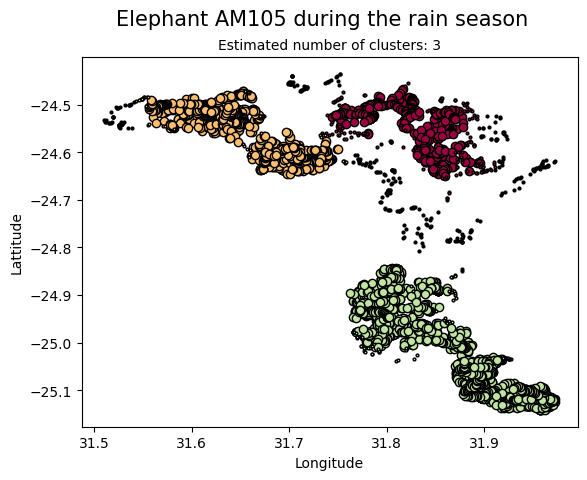

In [15]:
# Rain season

# Creating colors
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(rain_unique_labels))]

# Creat7ing the plot
for k, col in zip(rain_unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = AM105_rain['labels'] == k

    xy = AM105_rain.loc[class_member_mask & AM105_rain['core_samples_mask']]
    plt.plot(
        xy['long'],
        xy['lat'],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

    xy = AM105_rain.loc[class_member_mask & ~AM105_rain['core_samples_mask']]
    plt.plot(
        xy['long'],
        xy['lat'],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=2,
    )

plt.suptitle("Elephant AM105 during the rain season", size = 15)
plt.title(f"Estimated number of clusters: {rain_n_clusters_}", size = 10)
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
plt.show()

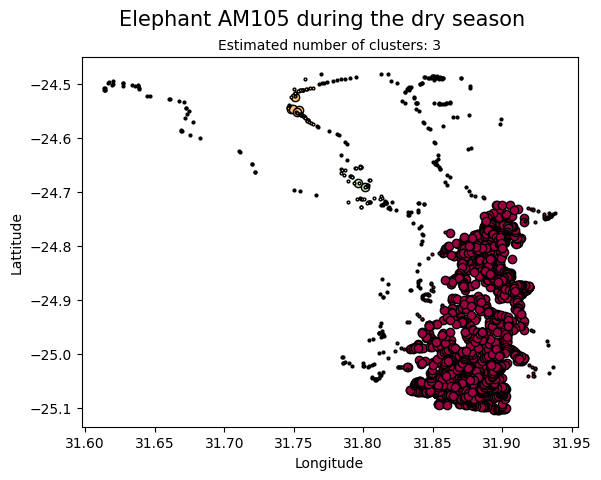

In [16]:
# Dry season

# Creating colors
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(dry_unique_labels))]

# Creating plot
for k, col in zip(dry_unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = AM105_dry['labels'] == k

    xy = AM105_dry.loc[class_member_mask & AM105_dry['core_samples_mask']]
    plt.plot(
        xy['long'],
        xy['lat'],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

    xy = AM105_dry.loc[class_member_mask & ~AM105_dry['core_samples_mask']]
    plt.plot(
        xy['long'],
        xy['lat'],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=2,
    )

plt.suptitle("Elephant AM105 during the dry season", size = 15)
plt.title(f"Estimated number of clusters: {rain_n_clusters_}", size = 10)
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
plt.show()

## Vizualisation with interactive map plots

In [17]:
# Rain saeson

# Creating colors
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(rain_unique_labels))]

# Creating plots
fig = go.Figure()

for k, col in zip(rain_unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    
    class_member_mask = AM105_rain['labels'] == k

    xy = AM105_rain.loc[class_member_mask & AM105_rain['core_samples_mask']]
    # Bigger black points to add a border/edge to the points 
    fig.add_trace(go.Scattermapbox(
        lat = xy['lat'],
        lon = xy['long'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=14,
            color=f'rgba{tuple([0, 0, 0, 1])}',
            opacity=1.0
        ),
        text=AM105_rain[['lat', 'long']],
        hoverinfo='text'
    ))

    # The color of the cluster
    fig.add_trace(go.Scattermapbox(
        lat = xy['lat'],
        lon = xy['long'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=12,
            color=f'rgba{tuple(col)}',
            opacity=1.0
        ),
        text=AM105_rain[['lat', 'long']],
        hoverinfo='text'
    ))



    xy = AM105_rain.loc[class_member_mask & ~AM105_rain['core_samples_mask']]
    # Bigger black points to add a border/edge to the points 
    fig.add_trace(go.Scattermapbox(
        lat = xy['lat'],
        lon = xy['long'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=9,
            color=f'rgba{tuple([0, 0, 0, 1])}',
            opacity=1.0
        ),
        text=AM105_rain[['lat', 'long']],
        hoverinfo='text',
    ))

    # The color of the cluster
    fig.add_trace(go.Scattermapbox(
        lat = xy['lat'],
        lon = xy['long'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=7,
            color=f'rgba{tuple(col)}',
            opacity=1.0
        ),
        text=AM105_rain[['lat', 'long']],
        hoverinfo='text',
    ))


fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(showlegend = False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},
mapbox={'center': go.layout.mapbox.Center(lat=-24.8, lon=32), 'zoom': 8})
fig.show()

In [18]:
# Dry season

# Creating colors
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(dry_unique_labels))]

# Creating plot
fig = go.Figure()

for k, col in zip(dry_unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]
    
    class_member_mask = AM105_dry['labels'] == k

    xy = AM105_dry.loc[class_member_mask & AM105_dry['core_samples_mask']]
    # Bigger black points to add a border/edge to the points 
    fig.add_trace(go.Scattermapbox(
        lat = xy['lat'],
        lon = xy['long'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=14,
            color=f'rgba{tuple([0, 0, 0, 1])}',
            opacity=1.0
        ),
        text=AM105_dry[['lat', 'long']],
        hoverinfo='text'
    ))

    # The color of the cluster
    fig.add_trace(go.Scattermapbox(
        lat = xy['lat'],
        lon = xy['long'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=12,
            color=f'rgba{tuple(col)}',
            opacity=1.0
        ),
        text=AM105_dry[['lat', 'long']],
        hoverinfo='text'
    ))



    xy = AM105_dry.loc[class_member_mask & ~AM105_dry['core_samples_mask']]
    # Bigger black points to add a border/edge to the points 
    fig.add_trace(go.Scattermapbox(
        lat = xy['lat'],
        lon = xy['long'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=9,
            color=f'rgba{tuple([0, 0, 0, 1])}',
            opacity=1.0
        ),
        text=AM105_dry[['lat', 'long']],
        hoverinfo='text',
    ))

    # The color of the cluster
    fig.add_trace(go.Scattermapbox(
        lat = xy['lat'],
        lon = xy['long'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=7,
            color=f'rgba{tuple(col)}',
            opacity=1.0
        ),
        text=AM105_dry[['lat', 'long']],
        hoverinfo='text',
    ))


fig.update_layout(mapbox_style="stamen-terrain")
fig.update_layout(showlegend = False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},
mapbox={'center': go.layout.mapbox.Center(lat=-24.8, lon=32), 'zoom': 8})
fig.show()